# 単変量線形回帰での外れ値の影響

In [1]:
import numpy as np
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

# 学習データ生成
* $x =0.0, 0.5, 1.0, \cdots, 10.0$
* サンプル数: 21
* $y = -x + 11 + \varepsilon,\ \varepsilon \sim N(0, 0.5^2)$ 

In [2]:
sample_size = 20 + 1
sigma = 0.5

seed = 1234
random.seed(seed)

x = np.array([0.5 *  i for i in range(sample_size)])
y = -x + 11 + [random.gauss(0, sigma)  for i in range(sample_size)]

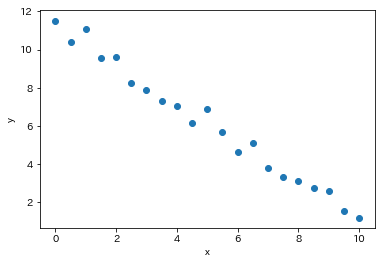

In [3]:
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y');

# 単変量線形回帰モデルの構築

In [4]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_fitted = model.predict(x)
print('決定係数: {:.3f}'.format(r2_score(y, y_fitted)))

決定係数: 0.984


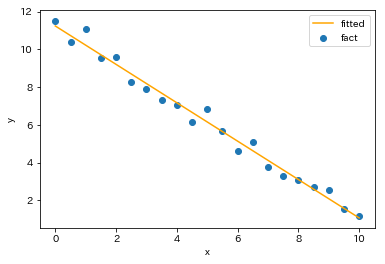

In [6]:
plt.scatter(x, y, label='fact')
plt.plot(x, y_fitted, color='orange', label='fitted')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# 学習データの範囲外での予測（外挿）

In [7]:
x_ext = 10 + np.array([0.2 * i for i in range(11)])
x_ext = x_ext.reshape(-1, 1)

y_ext = model.predict(x_ext)

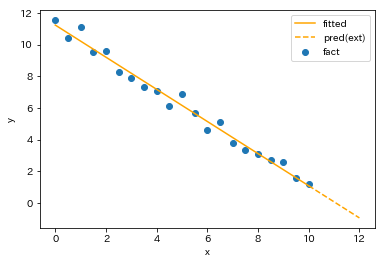

In [8]:
plt.scatter(x, y, label='fact')
plt.plot(x, y_fitted, color='orange', label='fitted')

plt.plot(x_ext, y_ext, color='orange', label='pred(ext)', linestyle='dashed')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# 学習データ中の外れ値の影響
* 点$(x, y) = (100, 100)$を学習データに追加

In [9]:
# (100, 100)を学習データに追加
x_outlier = np.append(x, [100]).reshape(-1, 1)
y_outlier = np.append(y, [100]).reshape(-1, 1)

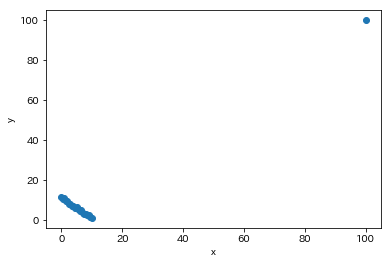

In [10]:
plt.scatter(x_outlier, y_outlier)

plt.xlabel('x')
plt.ylabel('y');

In [11]:
model = LinearRegression()
model.fit(x_outlier, y_outlier)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_fitted = model.predict(x_outlier)
print('決定係数: {:.3f}'.format(r2_score(y_outlier, y_fitted)))

決定係数: 0.912


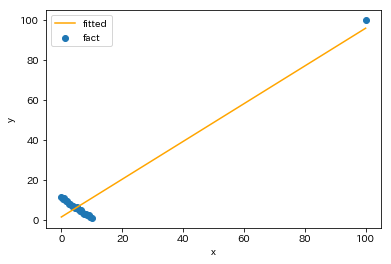

In [13]:
plt.scatter(x_outlier, y_outlier, label='fact')
plt.plot(x_outlier, y_fitted, color='orange', label='fitted')

plt.legend()
plt.xlabel('x')
plt.ylabel('y');

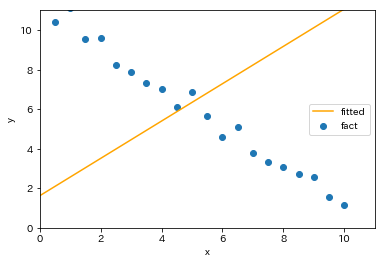

In [14]:
plt.scatter(x_outlier, y_outlier, label='fact')
plt.plot(x_outlier, y_fitted, color='orange', label='fitted')

plt.xlim([0, 11])
plt.ylim([0, 11])
plt.legend()
plt.xlabel('x')
plt.ylabel('y');